In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("C:/Users/thaku/jupyter notebook datasets/WELFake_Dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/thaku/jupyter notebook datasets/WELFake_Dataset.csv'

In [ ]:
data.sample(n=10)

,Unnamed: 0,title,text,label
29274,29274,"Democrats link guns to terrorism, turn to gun ...",WASHINGTON (Reuters) - President Barack Obama ...,0
9536,9536,BREAKING #BALTIMORE RIOT VIDEOS: REPORT Black ...,"Pray for these police officers, the innocent c...",1
47388,47388,NaN,Wow ever notice how when a liar is caught he/s...,1
26474,26474,POLL: Who will win Florida? - USAPoliticsNow,Comments \nDonald Trump has a 2 percentage poi...,1
938,938,MISLEADING MAINSTREAM MEDIA Is Pushing False N...,Here is Michigan elector Michael Banerian tell...,1
3102,3102,Five Sauces for the Modern Cook - The New York...,Without apology or even a trace of sheepishnes...,0
60720,60720,United Arab Emirates says to announce governme...,DUBAI (Reuters) - Sheikh Mohammed bin Rashid A...,0
51418,51418,UK defense minister: PM May decides on cabinet...,LONDON (Reuters) - British defense minister Ga...,0
68076,68076,Are Final Clubs Too Exclusive for Harvard? - T...,One midnight near semester’s end on the skirts...,0
41760,41760,Russian military working on deal to use Egypti...,MOSCOW (Reuters) - Russia s government publish...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63121 entries, 0 to 72132
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   63121 non-null  object
 1   text    63121 non-null  object
 2   label   63121 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
data['label'].value_counts().values

array([34791, 28330])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

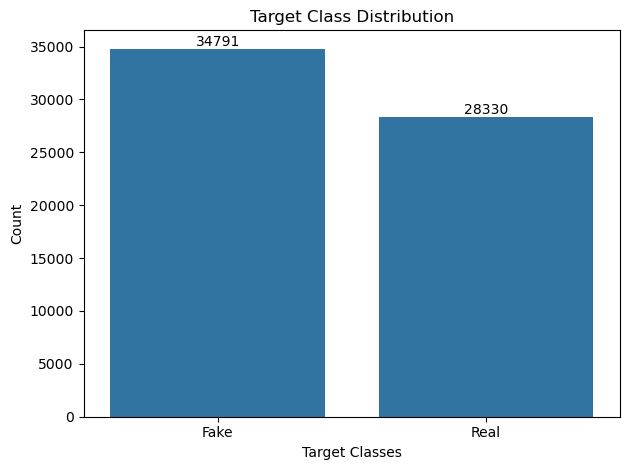

In [ ]:
ax= sns.barplot(x=data['label'].value_counts().index,y=data['label'].value_counts().values)
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=['Fake','Real'])
plt.tight_layout()
for i, value in enumerate(data['label'].value_counts().values):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

In [ ]:
import string
exclude =string.punctuation

In [ ]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    text=text.translate(str.maketrans('', '', exclude))
    return text.lower().strip()

In [ ]:
data['text']=data['text'].apply(remove_punctuation)
data['title']=data['title'].apply(remove_punctuation)

In [ ]:
data.head(5)

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last ni...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1
5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1


In [ ]:
from bs4 import BeautifulSoup

def has_html_tags_bs(text):
    return text != BeautifulSoup(text, "html.parser").get_text()

In [ ]:
check_html_text= data['text'].apply(has_html_tags_bs)
check_html_title = data['title'].apply(has_html_tags_bs)
print(check_html_text.value_counts())
print(check_html_title.value_counts())

text
False    63121
Name: count, dtype: int64
title
False    63121
Name: count, dtype: int64


In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 5.5 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 5.3 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 5.7 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 6.0 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 6.2 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 6.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 6.5 MB/s eta 0:00:01
     --------------------------------- ------ 10.7/12.8 MB 6.5 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import os
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])

def batch_lemmatize(texts, batch_size=800, n_process=4):
    results = []
    for doc in nlp.pipe(texts, batch_size=batch_size, n_process=n_process):
        lemmas = [
            token.lemma_.lower() for token in doc
            if token.is_alpha and not token.is_stop and len(token) > 2
        ]
        results.append(" ".join(lemmas))
    return results

In [ ]:
texts = data["text"].astype(str).tolist()
titles = data["title"].astype(str).tolist()

In [ ]:
data['clean_title'] = batch_lemmatize(titles)
data['clean_text'] = batch_lemmatize(texts)

In [ ]:
pd.set_option("display.max_colwidth",None)
data.head(5)

title  \
0           law enforcement on high alert following threats against cops and whites on 911by blacklivesmatter and fyf911 terrorists video   
2  unbelievable obama’s attorney general says most charlotte rioters were “peaceful” protesters…in her home state of north carolina video   
3                                 bobby jindal raised hindu uses story of christian conversion to woo evangelicals for potential 2016 bid   
4                                          satan 2 russia unvelis an image of its terrifying new ‘supernuke’ – western world takes notice   
5                                                           about time christian group sues amazon and splc for designation as hate group   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data.to_csv("New_data.csv",index=False)

In [ ]:
data.sample(4)

,Unnamed: 0,title,text,label
28644,28644,"One Star Over, a Planet That Might Be Another ...",Another Earth could be circling the star right...,0
25856,25856,U.S. lawmakers delay bill on European data pri...,WASHINGTON (Reuters) - Legislation that would ...,0
63692,63692,Las Vegas May Become the New Amsterdam,Las Vegas May Become the New Amsterdam 11/07/2...,1
30873,30873,Muhammad Ali: The Champion Who Never Sold Out ...,Muhammad Ali was an ungentrified black man. Th...,0


## Using Text only for Vectorization

In [ ]:
import pandas as pd
new_data = pd.read_csv(r"/New_data.csv")

In [ ]:
new_data.head()

,title,text,label,clean_title,clean_text
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,law enforcement high alert follow threat cop w...,comment expect barack obama member fukyoflag b...
1,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last ni...,1,unbelievable obama attorney general say charlo...,demonstrator gather night exercise constitutio...
2,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0,bobby jindal raise hindu use story christian c...,dozen politically active pastor come private d...
3,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1,satan russia unveli image terrifying new super...,sarmat missile dub satan replace fly mile sec ...
4,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,time sue southern poverty law centeron tuesday...


In [ ]:
new_data.dropna(subset=["clean_text","clean_title"],inplace=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
model_NB= Pipeline([("CountVectorizer",CountVectorizer()),
                   ("classification",MultinomialNB())])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_data["clean_text"],new_data["label"],test_size=0.2,random_state=1)

In [ ]:
x_train

28538    washington reuters russia ambassador washingto...
41663    bad day donald trump conservative racist mediu...
29357    tunis reuters tunisia navy rescue migrant incl...
61598    analyze real time second presidential debate d...
32818    cleveland reuters woman arrest tuesday climb f...
                               ...                        
32848    washington secretly arrest national security a...
5258     berkeley calif fire burn cradle free speech fu...
12316    liz harrington writer washington free beacon a...
33342    cairo reuters saudile military coalition say s...
63088    change doesn change truth female genital mutil...
Name: clean_text, Length: 50026, dtype: object

In [ ]:
param_grid = {
    'CountVectorizer__max_df': [0.8, 1.0],
    'CountVectorizer__min_df': [2, 5],
    'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
    'CountVectorizer__max_features': [10000, 20000],
    'classification__alpha': [0.1, 0.5, 1.0]
}

In [ ]:
random_search = RandomizedSearchCV(
    model_NB,
    param_distributions=param_grid,
    n_iter=24,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=4,
    random_state=1
)
random_search.fit(x_train, y_train)
print("Best Params:", random_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


## Using TFID with naive bayes classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.75, min_df=5, ngram_range=(1, 2))),
    ('clf', MultinomialNB(alpha=np.float64(0.7000000000000001)))
])

In [ ]:
import numpy as np
param_dist = {
    'tfidf__max_df': [0.75, 0.9, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [10000, 20000, None],
    'clf__alpha': np.linspace(0.1, 1.0, 10)  # Smoothing parameter
}

In [ ]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

In [ ]:
y_predict =pipeline.predict(x_test)

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.75, min_df=5, ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=np.float64(0.7000000000000001)))])

In [ ]:
random_search.best_params_

NameError: name 'random_search' is not defined

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6940
           1       0.90      0.82      0.86      5567

    accuracy                           0.88     12507
   macro avg       0.88      0.87      0.88     12507
weighted avg       0.88      0.88      0.88     12507



In [ ]:
pip install gensim scikit-learn nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
import spacy
from gensim.models import Word2Vec

In [ ]:
new_data["clean_text"][0]

'comment expect barack obama member fukyoflag blacklivesmatter movement call lynching hanging white people cop encourage radio tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer call sunshine radio blog host texas call sunshine fing opinion radio snapshot lolatwhitefear twitter page show urge supporter tonight continue dismantle illusion white snapshot twitter radio invite radio air eastern standard timedure caller clearly lynching kill white peoplea minute clip radio hear provide breitbart texas like refer hannibal receive death threat result interrupt conference callsan unidentified black man say mother fker start fe like bunch nier takin roll say cause roll gang seven black mother fcker white person lynch ass let turn table conspire cop start lose people state emergency speculate thing happen bigass war nier go start backin get kill get lose sunshine hear say yep true fking true say need turn table kid get shoot somebody need

In [ ]:
nlp = spacy.load("en_core_web_sm")
def spacy_tokenizer(text):
  doc = nlp(text.lower())
  return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

In [ ]:
tokenized_content = new_data["clean_text"].apply(spacy_tokenizer).tolist()

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=tokenized_content,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=0
)

In [ ]:
import numpy as np
def get_avg_w2v(tokens, model):
    vec = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

X = np.array([get_avg_w2v(doc, w2v_model) for doc in tokenized_content])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,new_data["label"],test_size=0.2,random_state=11)

In [ ]:
import pickle
with open("tokenized_content.pkl",'wb') as file:
  pickle.dump(tokenized_content,file)

In [ ]:
x_train.shape

(50026, 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Random Forest Classifier with Word2Vec

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Define model
rf = RandomForestClassifier(random_state=78)

# Hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=80,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='f1'
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_rf = random_search.best_estimator_

print(best_rf)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
                       random_state=78)


In [ ]:
y_pred = best_rf.predict(x_test)
y_proba = best_rf.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      6899
           1       0.87      0.86      0.87      5608

    accuracy                           0.88     12507
   macro avg       0.88      0.88      0.88     12507
weighted avg       0.88      0.88      0.88     12507

ROC AUC Score: 0.9484096136242532
